# sklearn Diabetes dataset - Linear Regression Model
당뇨 데이터셋 - 선형회귀 모형

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [57]:
#데이터셋 불러오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [58]:
#데이터셋 정보 확인
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [59]:
#판다스 데이터프레임로 데이터 불러오기
diabetes_fr = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_fr.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [60]:
#target(quantitative measure of disease progression one year after baseline) 추가
diabetes_fr['target'] = diabetes.target
diabetes_fr.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [61]:
#빈 값 확인
diabetes_fr.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


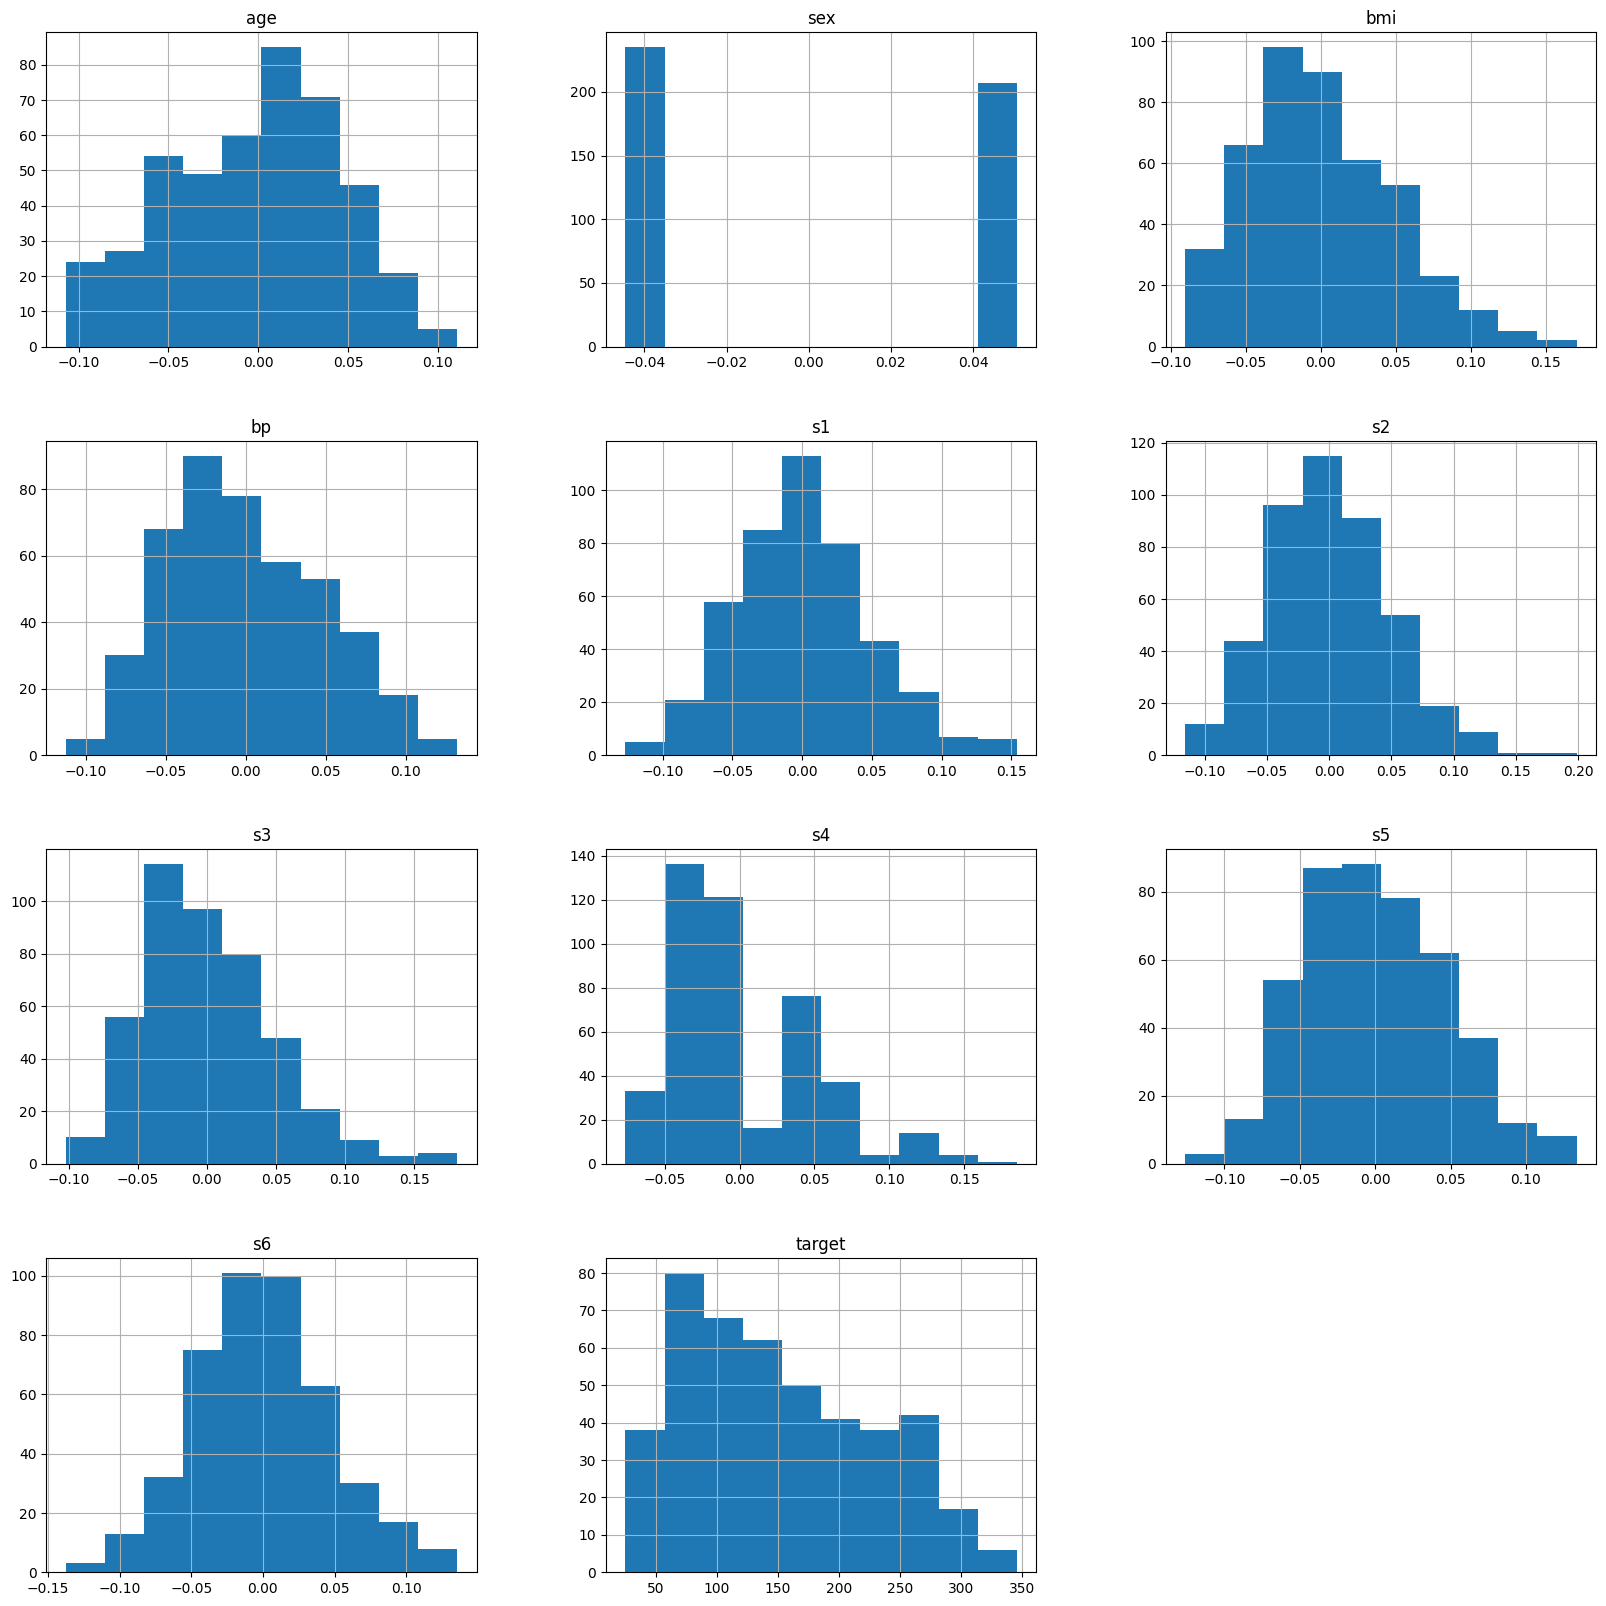

In [62]:
#데이터 특성 시각적으로 확인
diabetes_fr.hist(figsize=(20,20))
plt.show()

<Axes: >

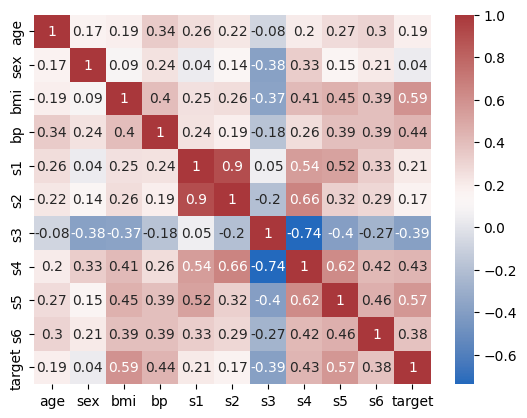

In [63]:
#변수 간 연관 관계 확인
correlation_matrix = diabetes_fr.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=(True), cmap='vlag')

변수 간 관계 확인 결과 Target과 가장 높은 상관관계를 가지는 bmi와 s5를 이용.

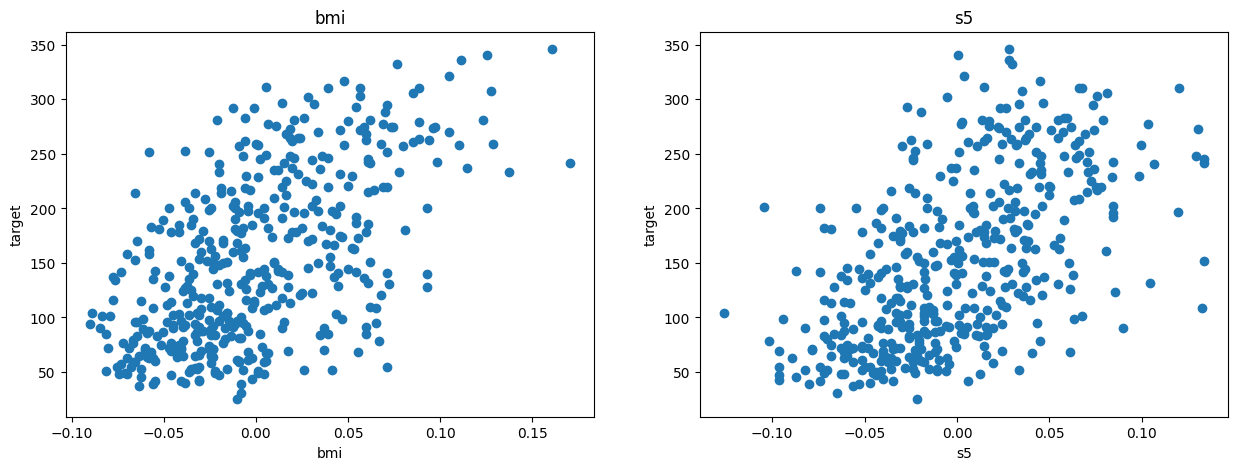

In [75]:
# scatter plot 으로 변수 간 관계 확인
plt.figure(figsize=(15, 5))

features = ['bmi', 's5']
target = diabetes_fr['target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = diabetes_fr[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('target')

In [76]:
# 학습 데이터
X = pd.DataFrame(np.c_[diabetes_fr['bmi'], diabetes_fr['s5']], columns = ['bmi','s5'])
Y = diabetes_fr['target']

In [77]:
# 데이터를 training set와 testing set로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 2)
(89, 2)
(353,)
(89,)


In [78]:
# 모델 training & testing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression().fit(X_train, Y_train)

RMSE(평균 제곱근 오차)와 r2 score로 모델 평가

In [79]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 56.560890965481114
R2 score is 0.4507519215172524


The model performance for testing set
--------------------------------------
RMSE is 57.1759740950605
R2 score is 0.4815610845742896


### 결론
sklearn의 diabetes 데이터의 특징을 알아보고 이를 이용해 회귀모델링을 하였다. 회귀모델의 결과는 당뇨 환자들의 병세 진행을 파악하는 데 이용될 수 있을 것이다. 이와 같이 우리 생활에서 일어나는 현상을 간단한 모델을 적용해서 풀었으므로 스스로에게 A 학점을 부여한다.